# <center><strong>Obesity risk</strong></center>

###### **By Mohamed Jamyl**

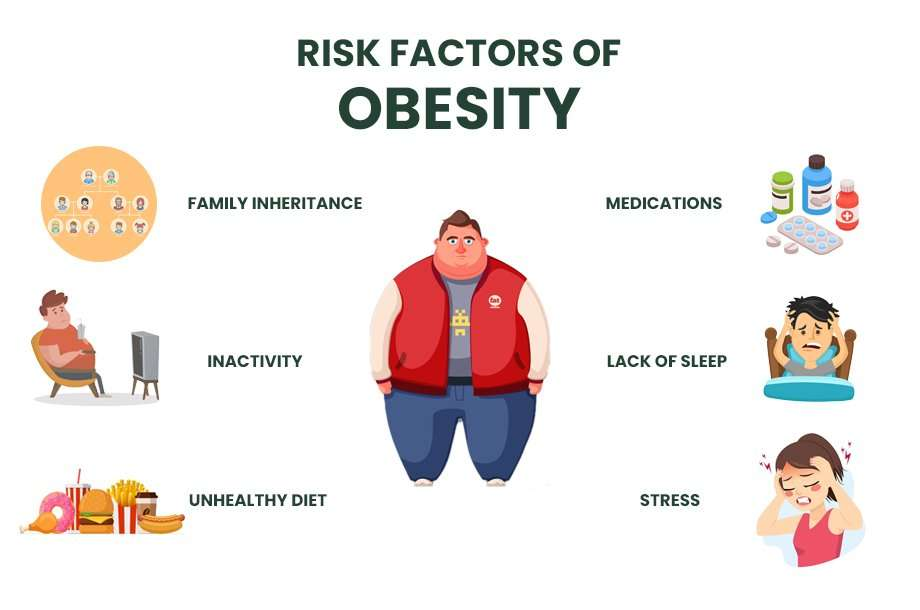

In [97]:
from IPython.display import Image
Image(filename='obe.jpg')

## <center><strong>Project Overview </strong></center>

### This Kaggle dataset provides comprehensive information on individuals, encompassing key attributes such as gender, age, height, weight, family history with overweight, dietary habits, physical activity, transportation mode, and the corresponding obesity level. The dataset is meticulously curated for research and analysis in the domain of health and lifestyle studies.nting obesity level)

--------------------------------------
--------------------------------------
--------------------------------------

## **Import Libraries**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder,StandardScaler
# from sklearn.metrics import classification_report


# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB 


import warnings
warnings.filterwarnings('ignore')

--------------------------------
--------------------------------
-------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

In [99]:
train_df= pd.read_csv('train_obesity.csv')
test_df= pd.read_csv('test_obesity.csv')

In [100]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [101]:
train_df.sample(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
13342,13342,Male,22.740275,1.737165,96.940255,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,no,Public_Transportation,Obesity_Type_I
15203,15203,Female,25.954995,1.737313,102.003378,yes,yes,3.000000,3.000000,Sometimes,no,1.484938,no,0.072117,0.925843,Sometimes,Public_Transportation,Obesity_Type_III
2465,2465,Female,25.919241,1.626503,110.714711,yes,yes,3.000000,3.000000,Sometimes,no,2.822871,no,0.943058,0.926443,Sometimes,Public_Transportation,Obesity_Type_III
7345,7345,Male,27.635029,1.755938,112.287678,yes,yes,1.947405,3.000000,Sometimes,no,2.049079,no,0.690269,0.971746,Sometimes,Automobile,Obesity_Type_II
12004,12004,Male,21.000000,1.700000,75.000000,yes,yes,3.000000,3.000000,Sometimes,no,3.000000,no,2.000000,1.000000,no,Public_Transportation,Overweight_Level_I
19318,19318,Male,21.000000,1.650000,95.000000,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,2.000000,no,Public_Transportation,Obesity_Type_I
8064,8064,Female,21.900120,1.711460,130.986338,yes,yes,3.000000,3.000000,Sometimes,no,1.304910,no,1.600536,0.912187,Sometimes,Public_Transportation,Obesity_Type_III
857,857,Female,34.290160,1.673333,84.803311,yes,yes,2.000000,1.820779,Sometimes,no,1.077253,no,1.304291,0.000000,no,Automobile,Obesity_Type_I
9919,9919,Male,23.000000,1.683502,97.588260,yes,yes,2.000000,3.000000,Sometimes,no,2.939847,no,2.697949,0.000000,no,Public_Transportation,Obesity_Type_I
9651,9651,Female,23.000000,1.700000,49.000000,no,yes,3.000000,3.000000,Frequently,no,2.000000,no,2.000000,0.000000,no,Public_Transportation,Insufficient_Weight


In [102]:
train_df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [103]:
train_df.shape

(20758, 18)

In [104]:
test_df.shape

(13840, 17)

In [105]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [106]:
train_df.rename(columns={'FAVC': 'Frequent consumption of high-caloric food', 'family_history_with_overweight':'Family history with overweight',
                          'FCVC': 'Frequency of vegetable consumption', 'NCP':'Number of main meals the person eats per day', 
                          'CAEC':'Consumption of food between meals', 'CH2O':'Daily water consumption', 
                          'SCC':'Whether the person takes calorie supplements', 'FAF':'Physical activity frequency', 
                          'TUE':'Time spent using technology', 'CALC':'Alcohol consumption', 'MTRANS':'Means of transportation used',
                           'NObeyesdad':'Obesity level class' } ,inplace=True)

In [107]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'Family history with overweight',
       'Frequent consumption of high-caloric food',
       'Frequency of vegetable consumption',
       'Number of main meals the person eats per day',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Whether the person takes calorie supplements',
       'Physical activity frequency', 'Time spent using technology',
       'Alcohol consumption', 'Means of transportation used',
       'Obesity level class'],
      dtype='object')

In [108]:
test_df.rename(columns={'FAVC': 'Frequent consumption of high-caloric food', 'family_history_with_overweight':'Family history with overweight',
                          'FCVC': 'Frequency of vegetable consumption', 'NCP':'Number of main meals the person eats per day', 
                          'CAEC':'Consumption of food between meals', 'CH2O':'Daily water consumption', 
                          'SCC':'Whether the person takes calorie supplements', 'FAF':'Physical activity frequency', 
                          'TUE':'Time spent using technology', 'CALC':'Alcohol consumption', 'MTRANS':'Means of transportation used'} ,inplace=True)

In [109]:
test_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'Family history with overweight',
       'Frequent consumption of high-caloric food',
       'Frequency of vegetable consumption',
       'Number of main meals the person eats per day',
       'Consumption of food between meals', 'SMOKE', 'Daily water consumption',
       'Whether the person takes calorie supplements',
       'Physical activity frequency', 'Time spent using technology',
       'Alcohol consumption', 'Means of transportation used'],
      dtype='object')

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20758 non-null  int64  
 1   Gender                                        20758 non-null  object 
 2   Age                                           20758 non-null  float64
 3   Height                                        20758 non-null  float64
 4   Weight                                        20758 non-null  float64
 5   Family history with overweight                20758 non-null  object 
 6   Frequent consumption of high-caloric food     20758 non-null  object 
 7   Frequency of vegetable consumption            20758 non-null  float64
 8   Number of main meals the person eats per day  20758 non-null  float64
 9   Consumption of food between meals             20758 non-null 

In [111]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13840 non-null  int64  
 1   Gender                                        13840 non-null  object 
 2   Age                                           13840 non-null  float64
 3   Height                                        13840 non-null  float64
 4   Weight                                        13840 non-null  float64
 5   Family history with overweight                13840 non-null  object 
 6   Frequent consumption of high-caloric food     13840 non-null  object 
 7   Frequency of vegetable consumption            13840 non-null  float64
 8   Number of main meals the person eats per day  13840 non-null  float64
 9   Consumption of food between meals             13840 non-null 

In [112]:
train_df.isnull().sum()

id                                              0
Gender                                          0
Age                                             0
Height                                          0
Weight                                          0
Family history with overweight                  0
Frequent consumption of high-caloric food       0
Frequency of vegetable consumption              0
Number of main meals the person eats per day    0
Consumption of food between meals               0
SMOKE                                           0
Daily water consumption                         0
Whether the person takes calorie supplements    0
Physical activity frequency                     0
Time spent using technology                     0
Alcohol consumption                             0
Means of transportation used                    0
Obesity level class                             0
dtype: int64

In [113]:
test_df.isnull().sum()

id                                              0
Gender                                          0
Age                                             0
Height                                          0
Weight                                          0
Family history with overweight                  0
Frequent consumption of high-caloric food       0
Frequency of vegetable consumption              0
Number of main meals the person eats per day    0
Consumption of food between meals               0
SMOKE                                           0
Daily water consumption                         0
Whether the person takes calorie supplements    0
Physical activity frequency                     0
Time spent using technology                     0
Alcohol consumption                             0
Means of transportation used                    0
dtype: int64

In [114]:
train_df.duplicated().sum()

0

In [115]:
test_df.duplicated().sum()

0

----------------------------
----------------------------
----------------------------

### **Basic Statistical Overview**
- Summary Statistical : **describe()**

In [116]:
train_df.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False).style.background_gradient(cmap='GnBu').bar(subset=["max"], color='#BB0000').bar(subset=["mean",], color='green') 

,count,mean,std,min,25%,50%,75%,max
id,20758.000000,10378.500000,5992.462780,0.000000,5189.250000,10378.500000,15567.750000,20757.000000
Weight,20758.000000,87.887768,26.379443,39.000000,66.000000,84.064875,111.600553,165.057269
Age,20758.000000,23.841804,5.688072,14.000000,20.000000,22.815416,26.000000,61.000000
Physical activity frequency,20758.000000,0.981747,0.838302,0.000000,0.008013,1.000000,1.587406,3.000000
Number of main meals the person eats per day,20758.000000,2.761332,0.705375,1.000000,3.000000,3.000000,3.000000,4.000000
Daily water consumption,20758.000000,2.029418,0.608467,1.000000,1.792022,2.000000,2.549617,3.000000
Time spent using technology,20758.000000,0.616756,0.602113,0.000000,0.000000,0.573887,1.000000,2.000000
Frequency of vegetable consumption,20758.000000,2.445908,0.533218,1.000000,2.000000,2.393837,3.000000,3.000000
Height,20758.000000,1.700245,0.087312,1.450000,1.631856,1.700000,1.762887,1.975663


In [117]:
train_df.select_dtypes(include='object').describe()

,Gender,Family history with overweight,Frequent consumption of high-caloric food,Consumption of food between meals,SMOKE,Whether the person takes calorie supplements,Alcohol consumption,Means of transportation used,Obesity level class
count,20758,20758,20758,20758,20758,20758,20758,20758,20758
unique,2,2,2,4,2,2,3,5,7
top,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,17014,18982,17529,20513,20071,15066,16687,4046


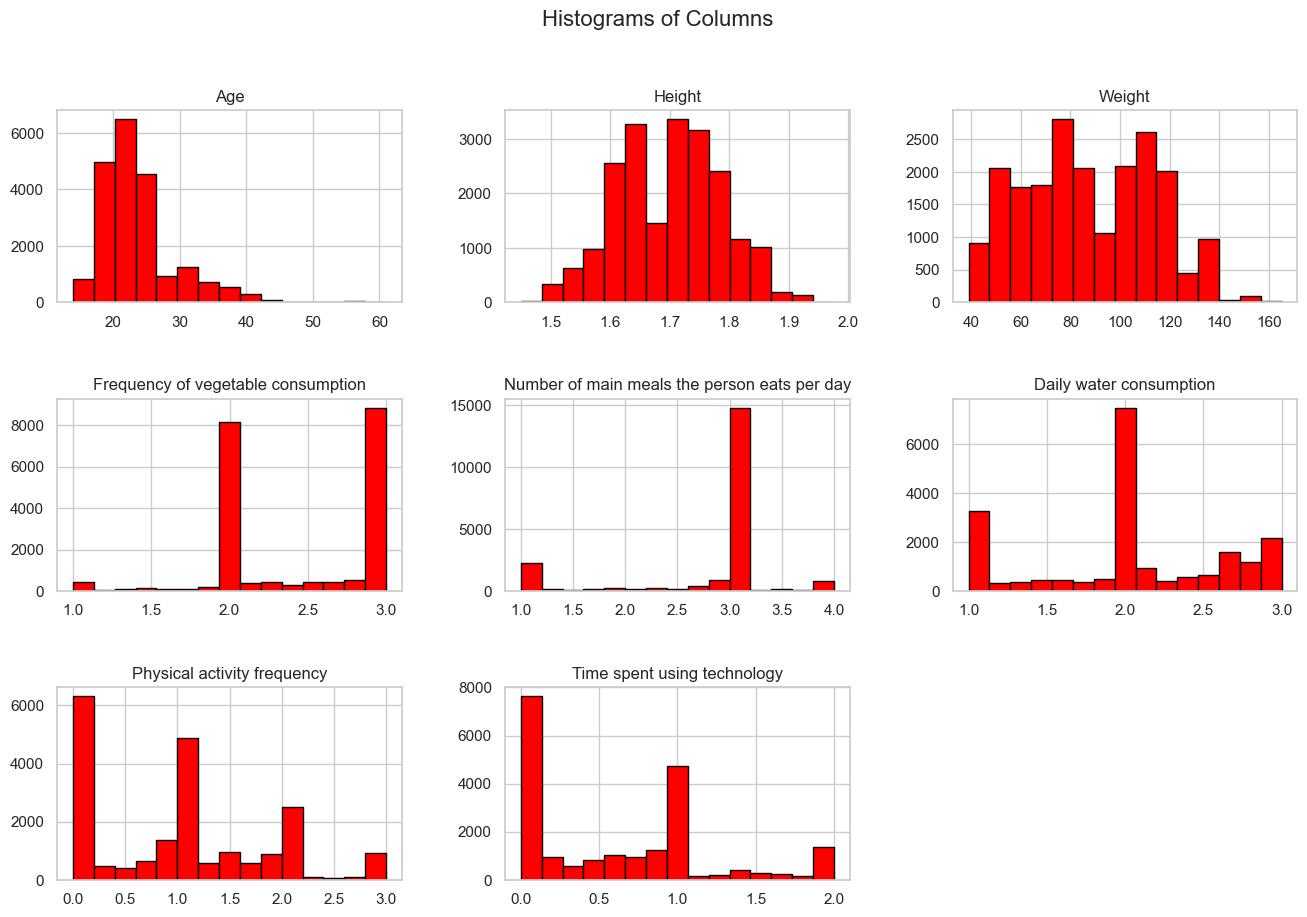

In [118]:
train_df.drop(columns='id', axis=1).hist(bins=15, figsize=(16, 10), color='red', edgecolor='black')

plt.suptitle('Histograms of Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)  
plt.show()

----------------------------

- Summary Statistical : **value_counts()**

In [119]:
train_df['Gender'].value_counts()

Gender
Female    10422
Male      10336
Name: count, dtype: int64

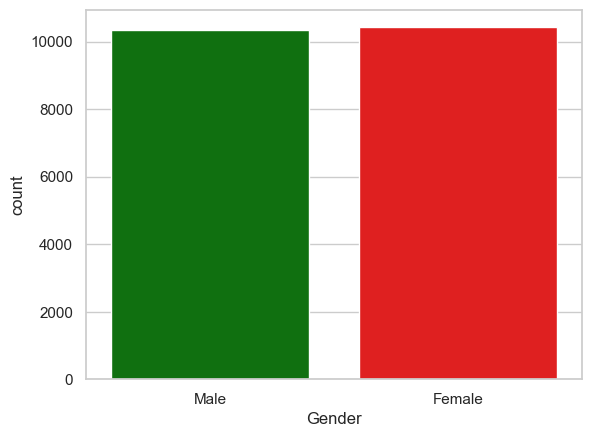

In [120]:
sns.countplot(x='Gender', data=train_df, palette=['green','red'])
plt.xlabel('Gender')
plt.show()

--------------------------

In [121]:
train_df['Family history with overweight'].value_counts()

Family history with overweight
yes    17014
no      3744
Name: count, dtype: int64

---------------------

In [123]:
train_df['Frequent consumption of high-caloric food'].value_counts()

Frequent consumption of high-caloric food
yes    18982
no      1776
Name: count, dtype: int64

-----------------------

In [124]:
train_df['Consumption of food between meals'].value_counts()

Consumption of food between meals
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64

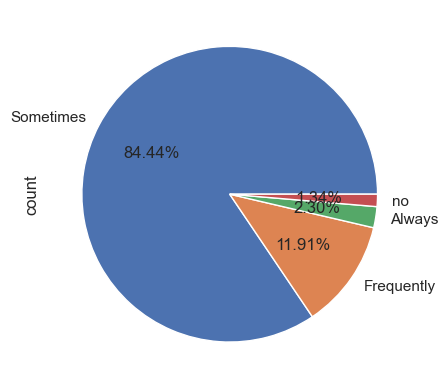

In [125]:
train_df['Consumption of food between meals'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

--------------------------

In [126]:
train_df['SMOKE'].value_counts()

SMOKE
no     20513
yes      245
Name: count, dtype: int64

---------------------

In [127]:
train_df['Whether the person takes calorie supplements'].value_counts()

Whether the person takes calorie supplements
no     20071
yes      687
Name: count, dtype: int64

---------------------------

In [128]:
train_df['Alcohol consumption'].value_counts()

Alcohol consumption
Sometimes     15066
no             5163
Frequently      529
Name: count, dtype: int64

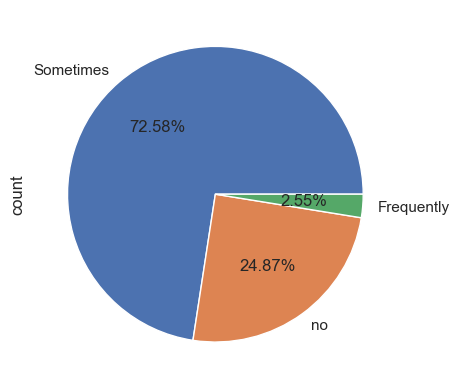

In [129]:
train_df['Alcohol consumption'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-----------------------------

In [130]:
train_df['Means of transportation used'].value_counts()

Means of transportation used
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

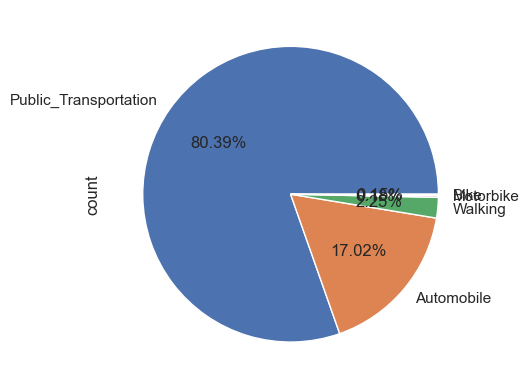

In [131]:
train_df['Means of transportation used'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-------------------------

In [132]:
train_df['Obesity level class'].value_counts()

Obesity level class
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

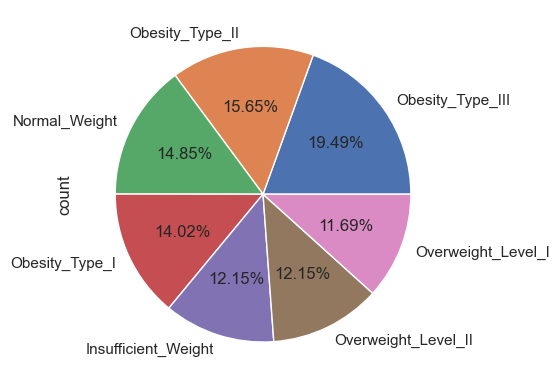

In [133]:
train_df['Obesity level class'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

--------------------------------
------------------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

In [ ]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


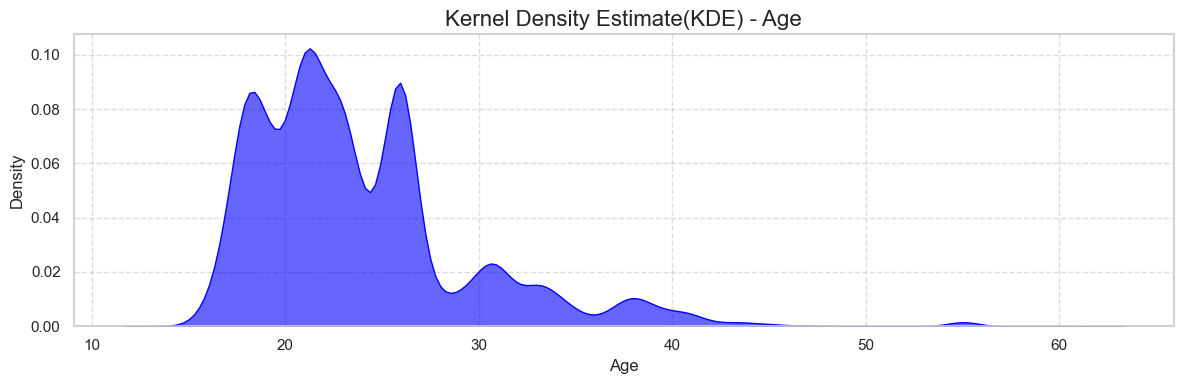

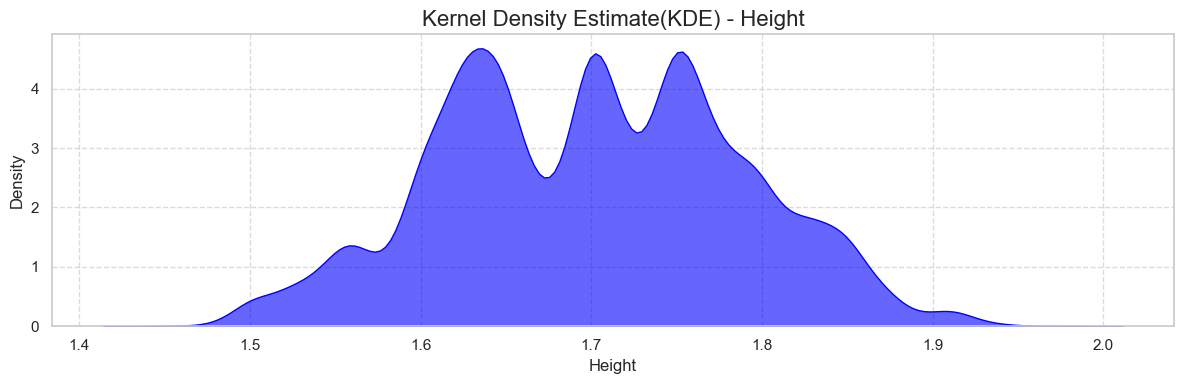

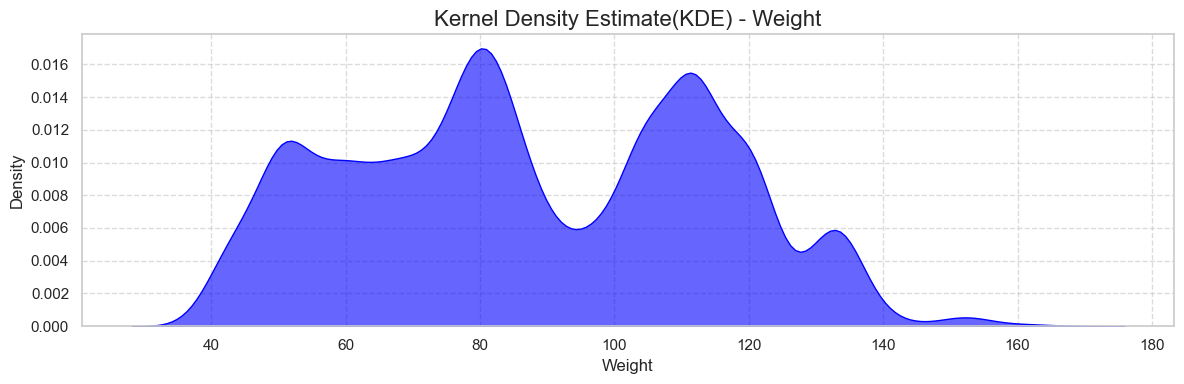

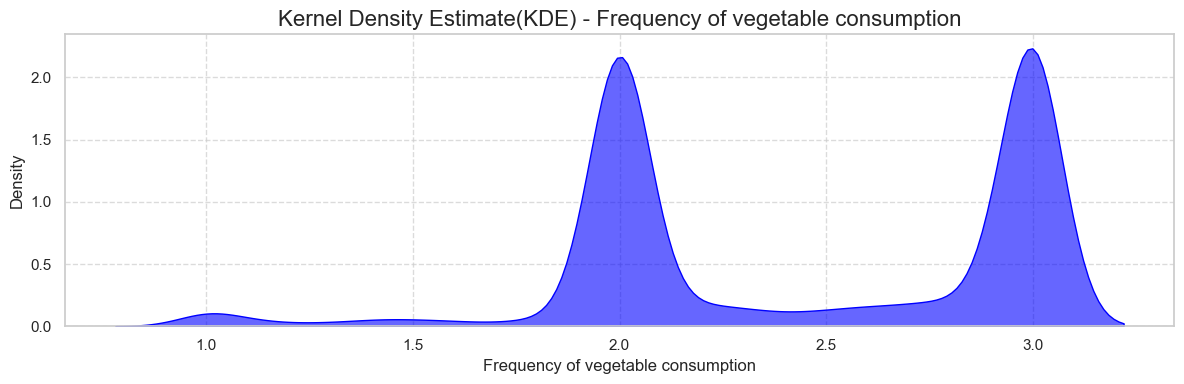

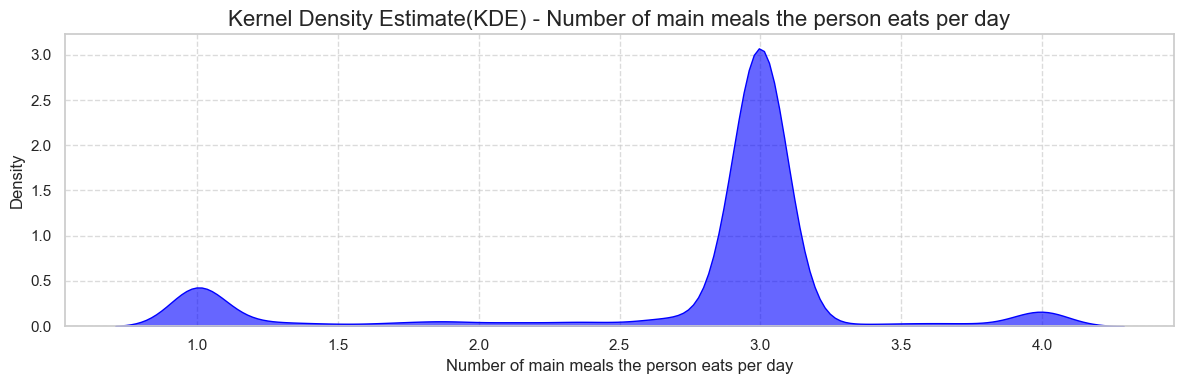

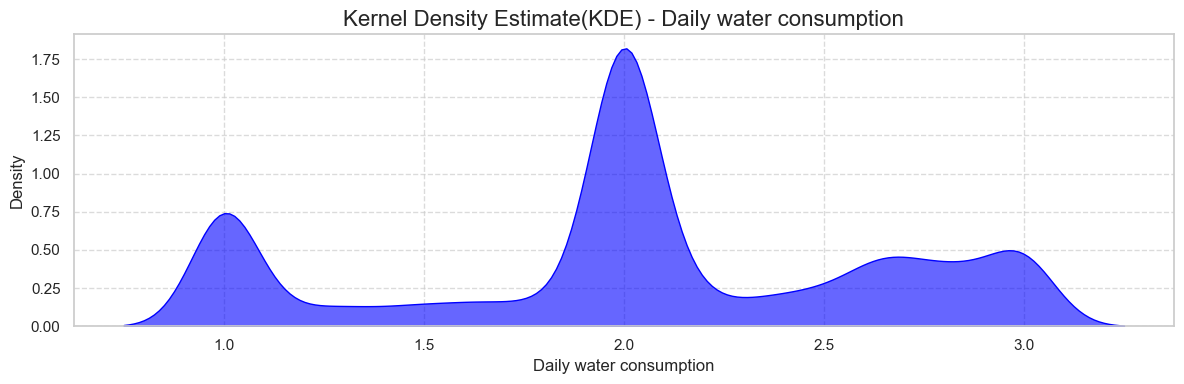

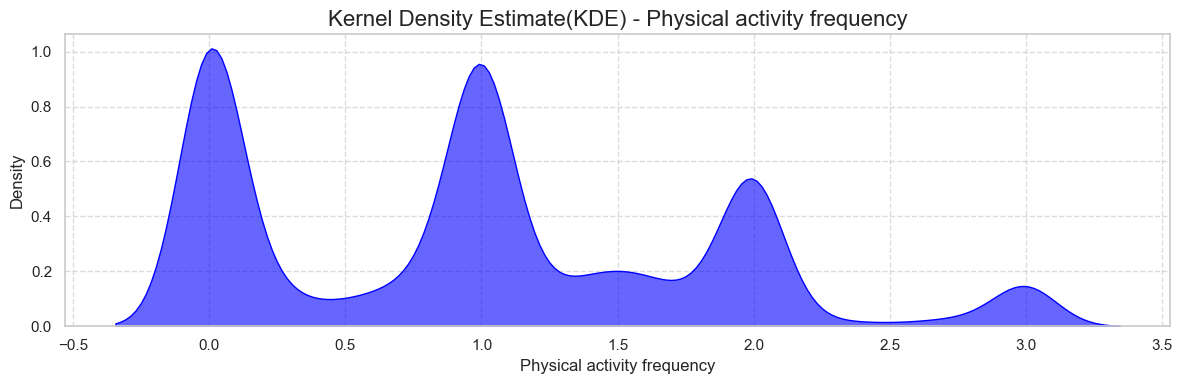

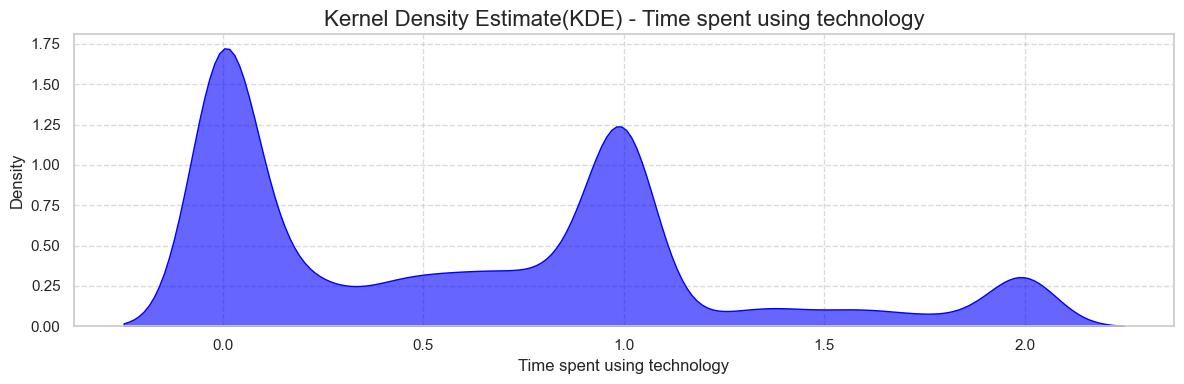

In [134]:
sns.set(style="whitegrid")
for	col	in train_df.drop(['id'],axis=1).select_dtypes('number').columns:
    plt.figure(figsize=(12,	4))
    sns.kdeplot(train_df[col], fill=True,	color='blue', alpha=0.6)
    plt.title(f'Kernel Density Estimate(KDE) - {col}',	fontsize=16)
    plt.xlabel(col,	fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

------------------------

### **Correlation**

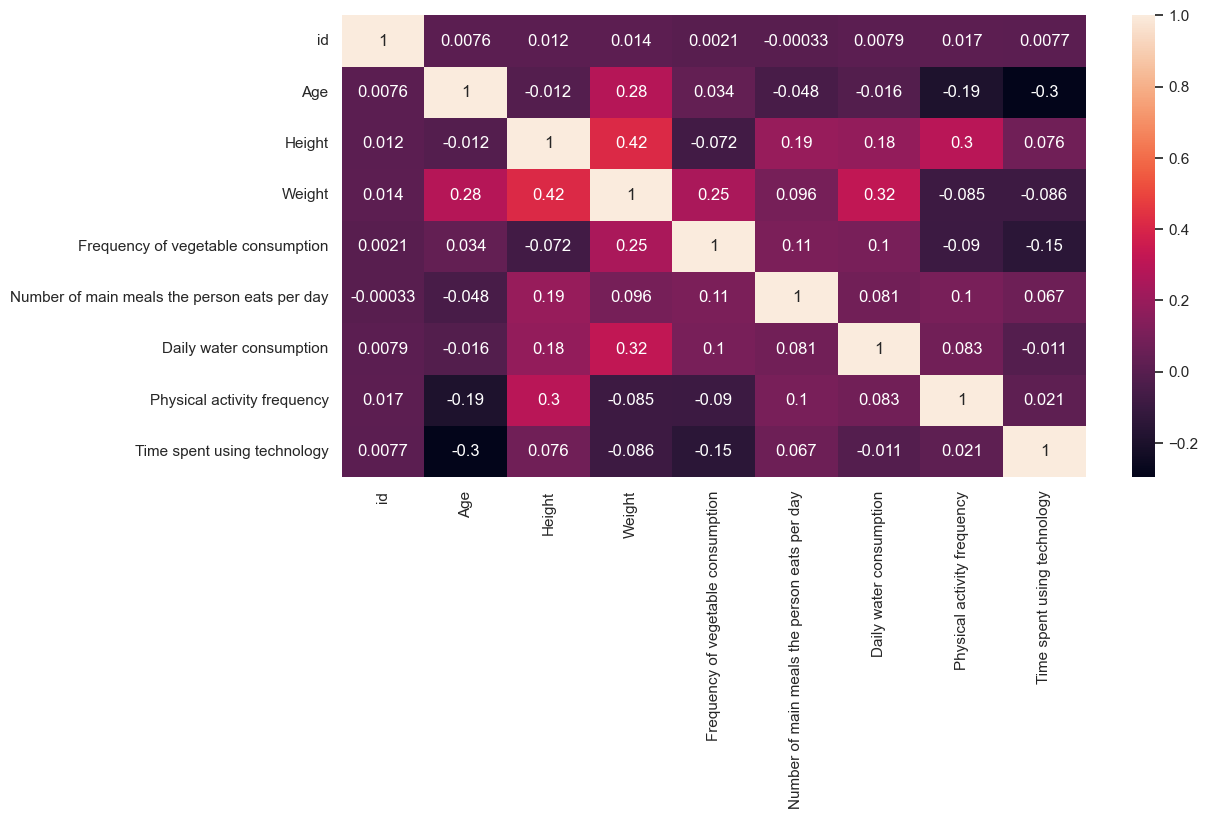

In [135]:
plt.figure(figsize=(12,	6))
sns.heatmap(train_df.select_dtypes(include='number').corr(), annot=True)
plt.show()

##### There is a high negative correlation (-0.3) between **Age** and **Time spent using technology**

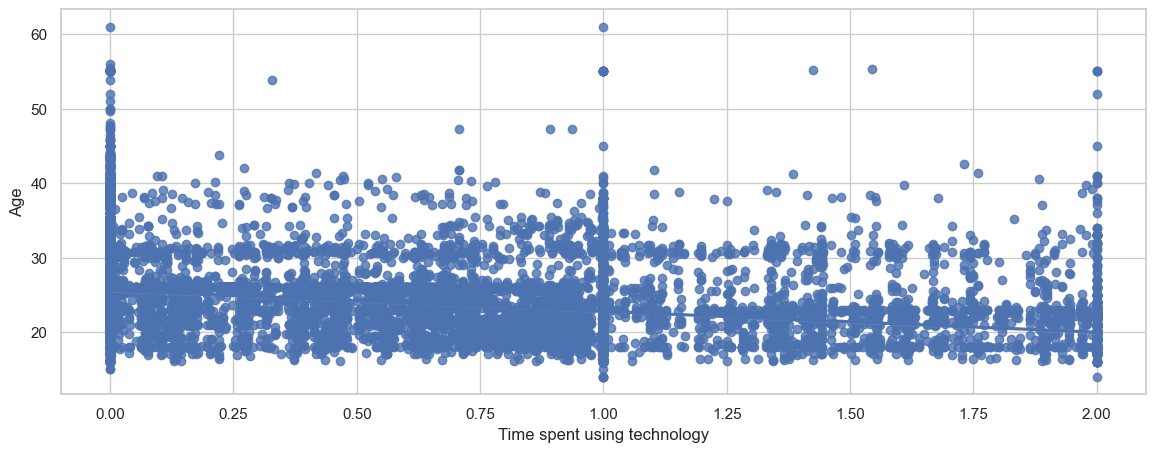

In [136]:
fig,ax = plt.subplots()
fig.set_size_inches(14, 5)
sns.regplot(x="Time spent using technology", y="Age", data=train_df,ax=ax)
plt.show()

------------------------------
-----------------------------

## **Feature Extraction**

-------------------------

In [137]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3.000000    7658
2.000000    7653
1.000000     275
2.967300     121
2.766612      54
            ... 
2.443674       1
1.111887       1
1.595746       1
2.577427       1
2.731368       1
Name: count, Length: 934, dtype: int64

In [138]:
test_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
2.000000    5173
3.000000    5043
1.000000     188
2.967300      81
2.766612      40
            ... 
1.587789       1
2.337035       1
2.939558       1
2.025479       1
2.813234       1
Name: count, Length: 828, dtype: int64

##### Transform values in column **Frequency of vegetable consumption** with **round** function

In [139]:
train_df['Frequency of vegetable consumption'] = train_df['Frequency of vegetable consumption'].apply(lambda x : round(x))
test_df['Frequency of vegetable consumption'] = test_df['Frequency of vegetable consumption'].apply(lambda x : round(x))

In [140]:
train_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
3    10092
2     9911
1      755
Name: count, dtype: int64

In [141]:
test_df['Frequency of vegetable consumption'].value_counts()

Frequency of vegetable consumption
2    6679
3    6678
1     483
Name: count, dtype: int64

#### Extracting new column **[Frequency of vegetable consumption Classes]** from **[Frequency of vegetable consumption]**

In [142]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

train_df['Frequency of vegetable consumption Classes'] = train_df['Frequency of vegetable consumption'].apply(lambda x : fcvc(x))

In [143]:
def fcvc(m):
    m = int(m)
    if m == 1:
        return 'Rarely consumes vegetables'
    if m == 2:
        return 'Sometimes consumes vegetables'
    if m == 3:
        return 'Regularly consumes vegetables'

test_df['Frequency of vegetable consumption Classes'] = test_df['Frequency of vegetable consumption'].apply(lambda x : fcvc(x))

In [144]:
train_df['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Regularly consumes vegetables    10092
Sometimes consumes vegetables     9911
Rarely consumes vegetables         755
Name: count, dtype: int64

In [145]:
test_df['Frequency of vegetable consumption Classes'].value_counts()

Frequency of vegetable consumption Classes
Sometimes consumes vegetables    6679
Regularly consumes vegetables    6678
Rarely consumes vegetables        483
Name: count, dtype: int64

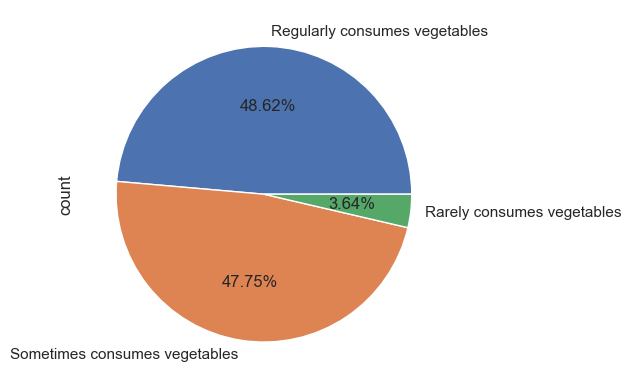

In [146]:
train_df['Frequency of vegetable consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-------------------------------

In [147]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3.000000    14706
1.000000     1976
4.000000      715
2.993623       39
2.695396       25
            ...  
3.608850        1
1.193486        1
2.737620        1
3.019574        1
2.256119        1
Name: count, Length: 689, dtype: int64

##### Transform values in column **Number of main meals the person eats per day** with **round** function

In [148]:
train_df['Number of main meals the person eats per day'] = train_df['Number of main meals the person eats per day'].apply(lambda x : round(x))
test_df['Number of main meals the person eats per day'] = test_df['Number of main meals the person eats per day'].apply(lambda x : round(x))

In [149]:
train_df['Number of main meals the person eats per day'].value_counts()

Number of main meals the person eats per day
3    16309
1     2510
4     1040
2      899
Name: count, dtype: int64

#### Extracting new column **[Number of main meals the person eats per day Classes]** from **[Number of main meals the person eats per day]**

In [150]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m == 4:
        return 'More than three meals'

train_df['Number of main meals the person eats per day Classes'] = train_df['Number of main meals the person eats per day'].apply(lambda x : fncp(x))

In [151]:
def fncp(m):
    m = int(m)
    if m == 1:
        return 'One meal per day'
    if m == 2:
        return 'Two meals per day'
    if m == 3:
        return 'Three meals per day'
    if m >= 4:
        return 'More than three meals'
test_df['Number of main meals the person eats per day Classes'] = test_df['Number of main meals the person eats per day'].apply(lambda x : fncp(x))

In [152]:
train_df['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      16309
One meal per day          2510
More than three meals     1040
Two meals per day          899
Name: count, dtype: int64

In [153]:
test_df['Number of main meals the person eats per day Classes'].value_counts()

Number of main meals the person eats per day Classes
Three meals per day      10839
One meal per day          1710
More than three meals      652
Two meals per day          639
Name: count, dtype: int64

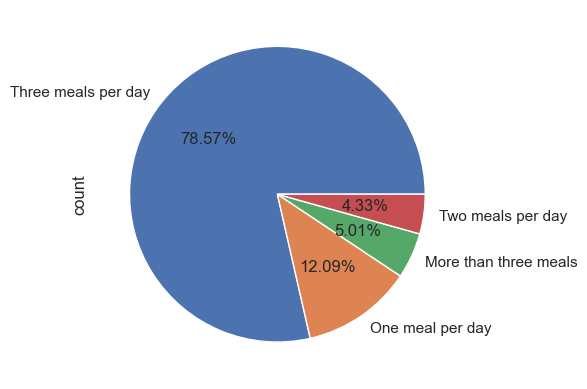

In [154]:
train_df['Number of main meals the person eats per day Classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

------------------------

#### Extracting new column **[Daily water consumption Classes]** from **[Daily water consumption]**

In [ ]:
train_df['Daily water consumption'].value_counts()

Daily water consumption
2.000000    6616
1.000000    2799
3.000000    1571
2.825629      77
2.868167      60
            ... 
2.835195       1
2.632983       1
2.090213       1
2.756916       1
1.365188       1
Name: count, Length: 1506, dtype: int64

In [156]:
def fncp(m):
    m = int(m)
    if m <= 1:
        return 'Low water intake'
    if m > 1 and m <= 2:
        return 'Moderate water intake'
    if m > 2:
        return 'High water intake'

train_df['Daily water consumption Classes'] = train_df['Daily water consumption'].apply(lambda x : fncp(x))

In [157]:
def fncp(m):
    m = int(m)
    if m <= 1:
        return 'Low water intake'
    if m > 1 and m <= 2:
        return 'Moderate water intake'
    if m > 2:
        return 'High water intake'

test_df['Daily water consumption Classes'] = test_df['Daily water consumption'].apply(lambda x : fncp(x))

In [158]:
train_df['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    13051
Low water intake          6136
High water intake         1571
Name: count, dtype: int64

In [159]:
test_df['Daily water consumption Classes'].value_counts()

Daily water consumption Classes
Moderate water intake    8557
Low water intake         4153
High water intake        1130
Name: count, dtype: int64

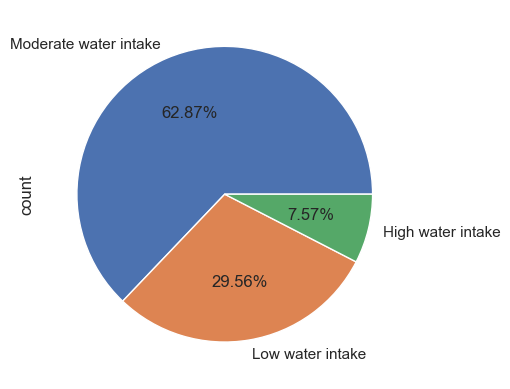

In [160]:
train_df['Daily water consumption Classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

------------------------

#### Extracting new column **[Physical activity frequency Classes]** from **[Physical activity frequency]**

In [162]:
train_df['Physical activity frequency'].value_counts()

Physical activity frequency
0.000000    5044
1.000000    4097
2.000000    2391
3.000000     800
1.097905      56
            ... 
1.706287       1
0.675983       1
1.923607       1
1.320209       1
0.988668       1
Name: count, Length: 1360, dtype: int64

In [163]:
def fncp(m):
    m = int(m)
    if m == 0 :
        return 'No physical activity'
    if m >= 0.1 and m <= 1 :
        return 'Very low activity'
    if m >= 1.1 and m < 2.6 :
        return 'Low to moderate activity'
    if m >= 2.6 and m < 4 :
        return 'Moderate activity'

train_df['Physical activity frequency Classes'] = train_df['Physical activity frequency'].apply(lambda x : fncp(x))

In [164]:
def fncp(m):
    m = int(m)
    if m == 0 :
        return 'No physical activity'
    if m >= 0.1 and m <= 1 :
        return 'Very low activity'
    if m >= 1.1 and m < 2.6 :
        return 'Low to moderate activity'
    if m >= 2.6 and m < 4 :
        return 'Moderate activity'

test_df['Physical activity frequency Classes'] = test_df['Physical activity frequency'].apply(lambda x : fncp(x))

In [ ]:
train_df['Physical activity frequency Classes'].value_counts()

FAF_classes
No physical activity        9191
Very low activity           7886
Low to moderate activity    2881
Moderate activity            800
Name: count, dtype: int64

In [165]:
test_df['Physical activity frequency Classes'].value_counts()

Physical activity frequency Classes
No physical activity        6163
Very low activity           5230
Low to moderate activity    1886
Moderate activity            561
Name: count, dtype: int64

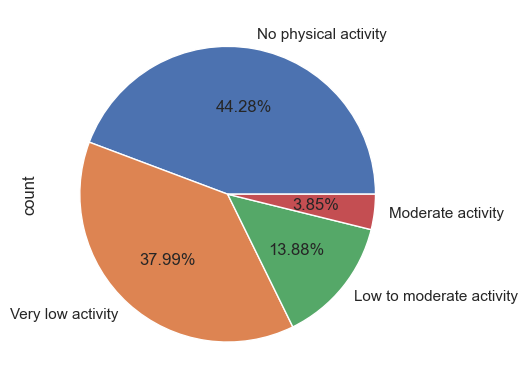

In [166]:
train_df['Physical activity frequency Classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

----------------------

#### Extracting new column **[Time spent using technology Classes]** from **[Time spent using technology]**

In [167]:
train_df['Time spent using technology'].value_counts()

Time spent using technology
0.000000    6566
1.000000    4326
2.000000    1133
0.002600      78
0.723154      65
            ... 
1.223661       1
0.057868       1
0.236067       1
0.073088       1
0.768375       1
Name: count, Length: 1297, dtype: int64

In [168]:
def fncp(m):
    m = int(m)
    if m <= 1 :
        return 'Very low screen time'
    if m >= 1.1 and m < 3.1 :
        return 'Moderate screen time'

train_df['Time spent using technology Classes'] = train_df['Time spent using technology'].apply(lambda x : fncp(x))

In [169]:
def fncp(m):
    m = int(m)
    if m <= 1 :
        return 'Very low screen time'
    if m > 1 and m < 3.1 :
        return 'Moderate screen time'

test_df['Time spent using technology Classes'] = test_df['Time spent using technology'].apply(lambda x : fncp(x))

In [170]:
train_df['Time spent using technology Classes'].value_counts()

Time spent using technology Classes
Very low screen time    19625
Moderate screen time     1133
Name: count, dtype: int64

In [171]:
test_df['Time spent using technology Classes'].value_counts()

Time spent using technology Classes
Very low screen time    13040
Moderate screen time      800
Name: count, dtype: int64

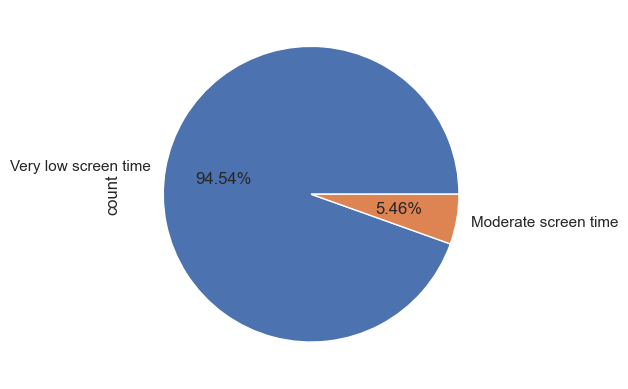

In [172]:
train_df['Time spent using technology Classes'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

-----------------------
-----------------------

## **Detect Outliers**

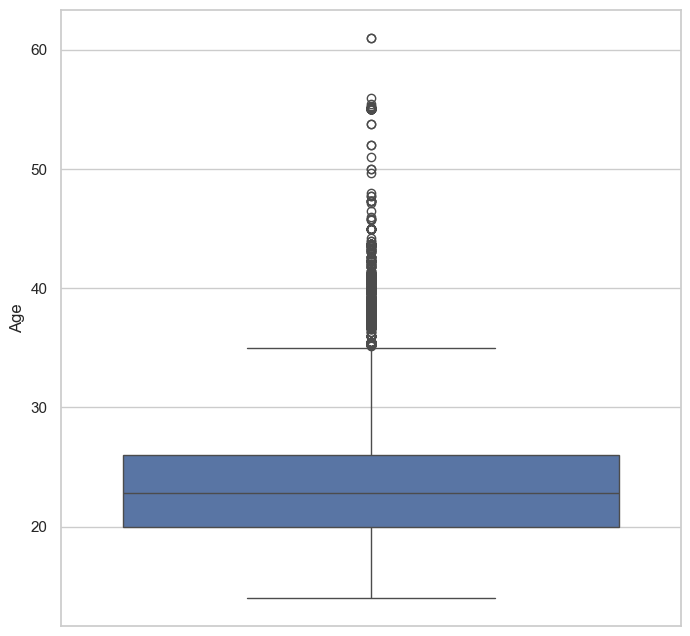

In [173]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
plt.show()

In [174]:
Q1=train_df['Age'].quantile(0.25)
Q3=train_df['Age'].quantile(0.75)
IQR = Q3-Q1

Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

outliers = ((train_df['Age']>Upper_bound)|(train_df['Age']<Lower_bound)).sum()
Total = train_df['Age'].shape[0]
print(f'Total of outliers in Age are : {outliers}--{round(100*(outliers)/Total,2)}%')
    
if outliers > 0:
    train_df=train_df.loc[(train_df['Age'] <= Upper_bound) & (train_df['Age'] >= Lower_bound)]

Total of outliers in Age are : 1074--5.17%


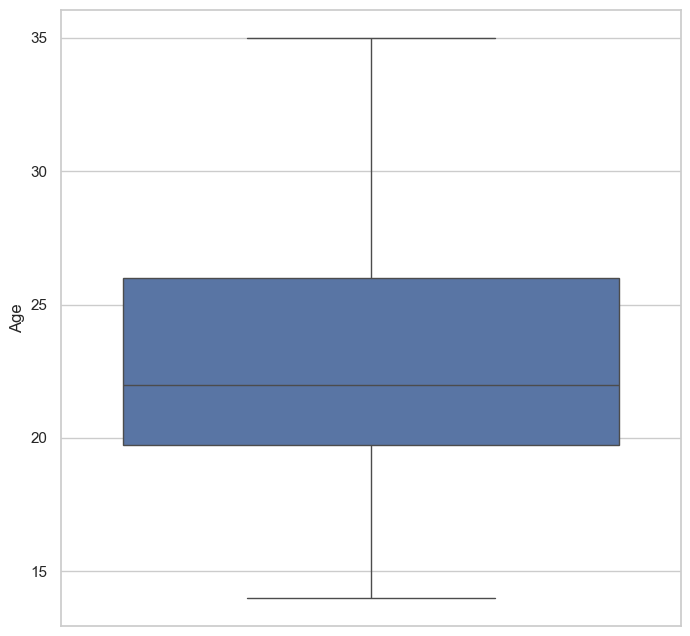

In [175]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 8)
sns.boxplot(data = train_df, y = 'Age', orient="v", ax=axes)
plt.show()

In [ ]:
# train_df.to_csv('train data (New data).csv',index=False)

------------------------
------------------------

## **Analysis**

In [ ]:
train_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,FAF,TUE,CALC,MTRANS,NObeyesdad,FCVC_classes,NCP_classes,CH2O_classes,FAF_classes,TUE_classes
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2,3,Sometimes,...,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity,Very low screen time
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2,3,Frequently,...,1.000000,1.000000,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2,1,Sometimes,...,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity,Very low screen time
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3,3,Sometimes,...,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity,Very low screen time
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3,2,Sometimes,...,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity,Very low screen time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,3,3,Sometimes,...,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3,4,Frequently,...,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity,Very low screen time
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2,3,Sometimes,...,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,3,2,Sometimes,...,0.000000,0.973834,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity,Very low screen time


##### **Investigate relationships between Gender and Physical activity frequency Classes**

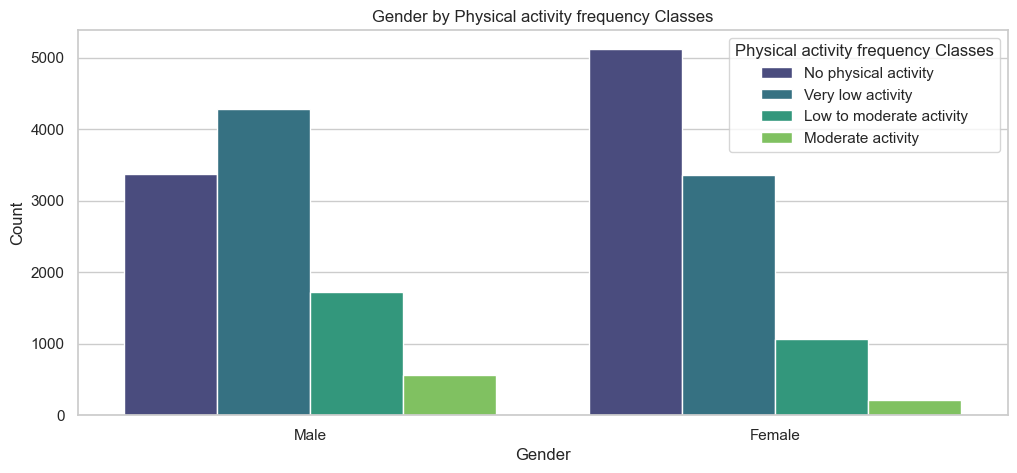

In [178]:
plt.figure(figsize=(12,	5))
sns.countplot(data=train_df, x='Gender', hue='Physical activity frequency Classes',	palette='viridis')
plt.title('Gender by Physical activity frequency Classes')
plt.xlabel('Gender')
# plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

##### **Investigate relationships between Gender and Obesity level class**

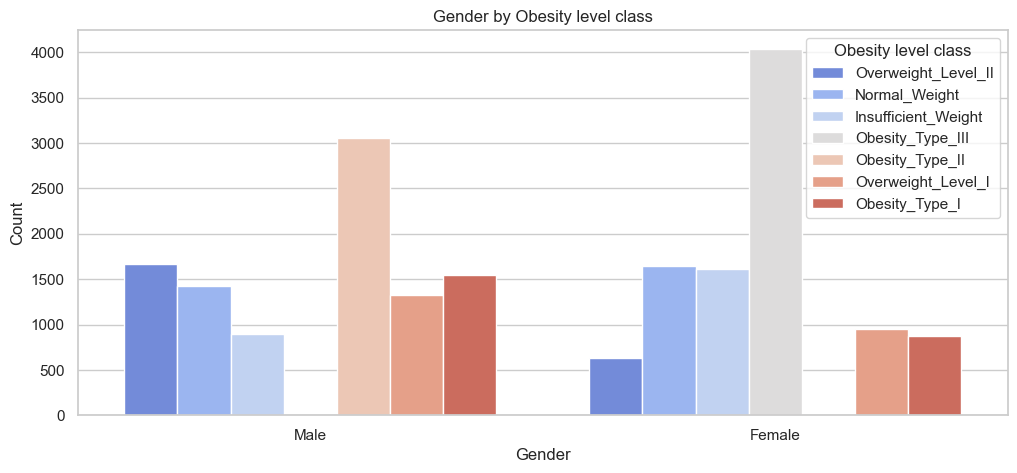

In [179]:
plt.figure(figsize=(12, 5))
sns.countplot(data=train_df, x='Gender', hue='Obesity level class', palette='coolwarm')
plt.title('Gender by Obesity level class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

##### **Analyze weight distribution by Gender**

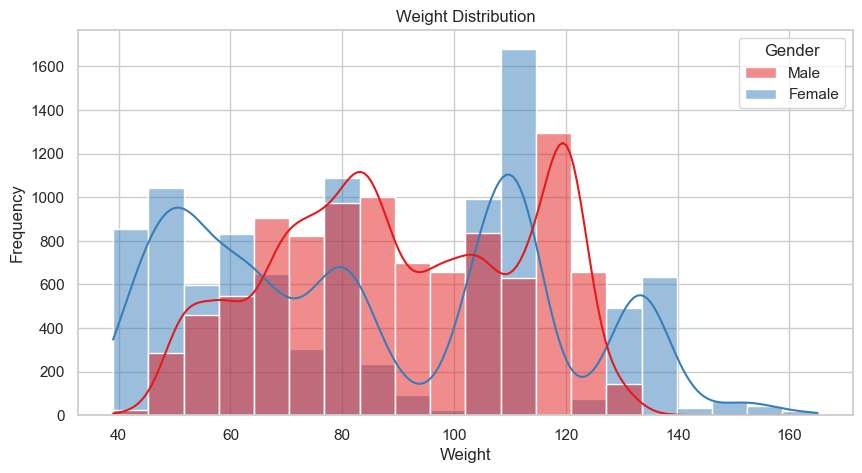

In [180]:
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df,	x='Weight',	hue='Gender', kde=True, bins=20, palette='Set1')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

##### **Analyze Height distribution by Gender**

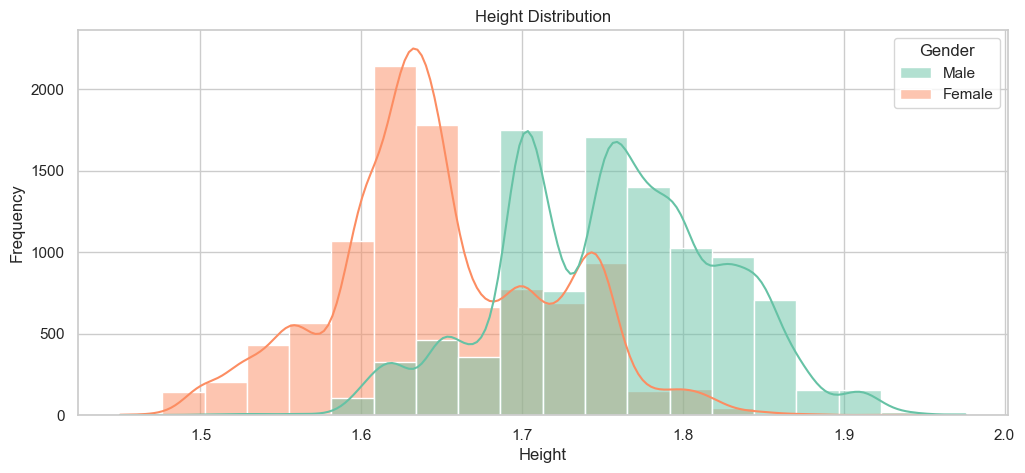

In [181]:
plt.figure(figsize=(12, 5))
sns.histplot(data=train_df,	x='Height',	hue='Gender', kde=True, bins=20, palette='Set2')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

In [182]:
train_df

,id,Gender,Age,Height,Weight,Family history with overweight,Frequent consumption of high-caloric food,Frequency of vegetable consumption,Number of main meals the person eats per day,Consumption of food between meals,...,Physical activity frequency,Time spent using technology,Alcohol consumption,Means of transportation used,Obesity level class,Frequency of vegetable consumption Classes,Number of main meals the person eats per day Classes,Daily water consumption Classes,Physical activity frequency Classes,Time spent using technology Classes
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2,3,Sometimes,...,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,No physical activity,Very low screen time
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2,3,Frequently,...,1.000000,1.000000,no,Automobile,Normal_Weight,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
2,2,Female,18.000000,1.711460,50.165754,yes,yes,2,1,Sometimes,...,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,Sometimes consumes vegetables,One meal per day,Low water intake,No physical activity,Very low screen time
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3,3,Sometimes,...,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,Regularly consumes vegetables,Three meals per day,Low water intake,Very low activity,Very low screen time
4,4,Male,31.641081,1.914186,93.798055,yes,yes,3,2,Sometimes,...,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Low water intake,Very low activity,Very low screen time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,3,3,Sometimes,...,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II,Regularly consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3,4,Frequently,...,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,Regularly consumes vegetables,More than three meals,Low water intake,Low to moderate activity,Very low screen time
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2,3,Sometimes,...,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II,Sometimes consumes vegetables,Three meals per day,Moderate water intake,Very low activity,Very low screen time
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,3,2,Sometimes,...,0.000000,0.973834,no,Automobile,Overweight_Level_II,Regularly consumes vegetables,Two meals per day,Moderate water intake,No physical activity,Very low screen time


## Transform Data

In [ ]:
# label = LabelEncoder()

In [ ]:
# obj = train_df.select_dtypes(include='object')
# non_obj = train_df.select_dtypes(exclude='object')

In [ ]:
# for col in range(0,obj.shape[1]):
#     obj.iloc[:,col]=label.fit_transform(obj.iloc[:,col])
# obj= obj.astype(int)

In [ ]:
# df=pd.concat([non_obj,obj],axis=1)

In [ ]:
# df.info()

In [ ]:
# test_df.head()

In [ ]:
# # for test
# objj = test_df.select_dtypes(include='object')
# non_objj = test_df.select_dtypes(exclude='object')

In [ ]:
# # for test
# for col in range(0,objj.shape[1]):
#     objj.iloc[:,col]=label.fit_transform(objj.iloc[:,col])
# objj= objj.astype(int)

In [ ]:
# df2= pd.concat([non_objj,objj],axis=1)

In [ ]:
# scaler=StandardScaler()

In [ ]:
# # for train
# sc1=df[['Age']]
# sc2=df[['Weight']]
# df['Age']=scaler.fit_transform(sc1)
# df['Weight']=scaler.fit_transform(sc2)

In [ ]:
# # for test 
# sc1=df2[['Age']]
# sc2=df2[['Weight']]
# df2['Age']=scaler.fit_transform(sc1)
# df2['Weight']=scaler.fit_transform(sc2)

## Creating model with neural networks